# Project Summary

*   Model 1 - Deep Neural Network
    * Train Accuracy = 1
    * Test Accuracy = 0.3507

*   Model 2 - LSTM
      * Train Accuracy = 1
      * Test Accuracy = 0.16628

*   Model 3 - GRU
      * Train Accuracy = 1
      * Test Accuracy = 0.2551

# Imports and Data Loading

## Import Lib

In [1]:
# Pandas and Numpy
import numpy as np
import pandas as pd

# Charting and plotting
from matplotlib import pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

# Ignore Warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Flatten, TimeDistributed, Dropout, GRU, BatchNormalization
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.preprocessing.text import Tokenizer

In [4]:
from keras import Input

In [5]:
from keras.optimizers import Adam

In [6]:
import datetime

In [7]:
import math

In [8]:
# Regular expression library
import re

In [9]:
from sklearn.preprocessing import OneHotEncoder

In [10]:
from numpy import asarray

In [11]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [12]:
import seaborn as sns

In [13]:
import random

In [14]:
# import chain
from itertools import chain

In [15]:
from pickle import load, dump

## Loading Dataset

In [16]:
path = '/content/drive/MyDrive/Mtech_Project/Dataset_Pose/Complete_landmark_IQR.csv'
df_landmark =  pd.read_csv(path)

In [17]:
df_landmark

,Unnamed: 0,POSE,IMG,TS,LEFT_WRIST_x,LEFT_WRIST_y,LEFT_THUMB_CMC_x,LEFT_THUMB_CMC_y,LEFT_THUMB_MCP_x,LEFT_THUMB_MCP_y,...,POSE_RIGHT_PINKY_y,POSE_LEFT_INDEX_x,POSE_LEFT_INDEX_y,POSE_RIGHT_INDEX_x,POSE_RIGHT_INDEX_y,POSE_LEFT_THUMB_x,POSE_LEFT_THUMB_y,POSE_RIGHT_THUMB_x,POSE_RIGHT_THUMB_y,FRAME
0,0,Poor,MVI_9740,0.0,0.554496,0.838187,0.541458,0.851108,0.535251,0.876889,...,0.886799,0.553980,0.875453,0.406508,0.889142,0.549191,0.857058,0.410023,0.873106,1.0
1,1,Poor,MVI_9740,40.0,0.554297,0.838304,0.540913,0.851934,0.535071,0.876347,...,0.895191,0.552354,0.879196,0.404798,0.897827,0.547828,0.861282,0.408076,0.881905,2.0
2,2,Poor,MVI_9740,80.0,0.554416,0.838873,0.540774,0.852190,0.534971,0.876794,...,0.900114,0.551111,0.881510,0.403723,0.902898,0.546612,0.864185,0.406815,0.886480,3.0
3,3,Poor,MVI_9740,120.0,0.554179,0.837562,0.540777,0.851432,0.535164,0.876312,...,0.900283,0.550759,0.882917,0.402930,0.903061,0.546411,0.865957,0.405994,0.887066,4.0
4,4,Poor,MVI_9740,160.0,0.554257,0.837522,0.540611,0.849596,0.534609,0.873970,...,0.901123,0.550163,0.882620,0.402751,0.903937,0.546070,0.865288,0.405875,0.887454,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146195,146195,Deaf,MVI_9580,2400.0,0.604286,0.823884,0.587952,0.834157,0.577890,0.853548,...,0.857297,0.593424,0.860416,0.459948,0.854962,0.591445,0.841620,0.463347,0.833281,81.0
146196,146196,Deaf,MVI_9580,2400.0,0.604286,0.823884,0.587952,0.834157,0.577890,0.853548,...,0.857297,0.593424,0.860416,0.459948,0.854962,0.591445,0.841620,0.463347,0.833281,82.0
146197,146197,Deaf,MVI_9580,2400.0,0.604286,0.823884,0.587952,0.834157,0.577890,0.853548,...,0.857297,0.593424,0.860416,0.459948,0.854962,0.591445,0.841620,0.463347,0.833281,83.0
146198,146198,Deaf,MVI_9580,2400.0,0.604286,0.823884,0.587952,0.834157,0.577890,0.853548,...,0.857297,0.593424,0.860416,0.459948,0.854962,0.591445,0.841620,0.463347,0.833281,84.0


## Train Test Split

In [18]:
poses = list(set(df_landmark.POSE))
print(poses)

['Chair', 'Sister', 'Boat', 'It', 'Ring', 'Pen', 'Fan', 'Afternoon', 'Daughter', 'Telephone', 'Peace', 'Hot', 'Friend', 'Actor', 'Bird', 'Tuesday', 'Grey', 'Soft', 'Spring', 'Death', 'Good_night', 'Screen', 'Cool', 'Bedroom', 'Hard', 'Dead', 'Shirt', 'Laptop', 'Healthy', 'Expensive', 'Wide', 'God', 'Bicycle', 'Paper', 'Yesterday', 'Big', 'Thank_you', 'Famous', 'Dry', 'T_Shirt', 'Grandmother', 'Brown', 'Strong', 'Good_evening', 'Wet', 'She', 'Dress', 'Child', 'Friday', 'Paint', 'Letter', 'Warm', 'Clock', 'Son', 'High', 'Table', 'Technology', 'Bed', 'Bill', 'Dog', 'Sad', 'Tomorrow', 'Kitchen', 'You', 'Narrow', 'Clothing', 'Cheap', 'Today', 'Wednesday', 'Patient', 'Man', 'Computer', 'Transportation', 'Loud', 'Priest', 'We', 'Ethnicity', 'Medicine', 'Nice', 'Mean', 'Baby', 'Phone', 'Monday', 'Pocket', 'Mother', 'Hat', 'Car', 'Lock', 'Fast', 'Pleased', 'Manager', 'Election', 'Deaf', 'Father', 'Fall', 'Bathroom', 'Lawyer', 'Fish', 'Girl', 'Animal', 'Ball', 'Female', 'Neighbour', 'Camera', 'P

In [19]:
train_imgs = list()
test_imgs = list()
for word in poses:
  imgs = list(set(df_landmark[df_landmark.POSE == word].IMG))
  random.shuffle(imgs)
  count = len(imgs)
  if count > 1:
    train_count = math.trunc(0.80*count)
    #print('Pose:',word,'|','Count:',count,'|','Train:',train_count)
    train_lst = imgs[:train_count]
    train_imgs.extend(train_lst)
    test_lst = imgs[train_count:count]
    test_imgs.extend(test_lst)
    print('Pose:',word,'|','Count:',count,'|','Train:',train_lst,'|','Test:',test_lst)
  else:
    print('Pose:',word,'|','Count:',count,'| Omited')

Pose: Chair | Count: 4 | Train: ['MVI_8755', 'MVI_8754', 'MVI_8757'] | Test: ['MVI_9006']
Pose: Sister | Count: 8 | Train: ['MVI_3930', 'MVI_4079', 'MVI_5247', 'MVI_8632', 'MVI_5099', 'MVI_5098'] | Test: ['MVI_3931', 'MVI_3932']
Pose: Boat | Count: 2 | Train: ['MVI_4190'] | Test: ['MVI_4189']
Pose: It | Count: 3 | Train: ['MVI_0076', 'MVI_0077'] | Test: ['MVI_0078']
Pose: Ring | Count: 6 | Train: ['MVI_8859', 'MVI_8858', 'MVI_8857', 'MVI_9087'] | Test: ['MVI_9085', 'MVI_9086']
Pose: Pen | Count: 9 | Train: ['MVI_4390', 'MVI_9032', 'MVI_8794', 'MVI_8793', 'MVI_4387', 'MVI_9033', 'MVI_9034'] | Test: ['MVI_8795', 'MVI_8791']
Pose: Fan | Count: 8 | Train: ['MVI_4532', 'MVI_4535', 'MVI_5390', 'MVI_9098', 'MVI_9097', 'MVI_4534'] | Test: ['MVI_4536', 'MVI_4533']
Pose: Afternoon | Count: 2 | Train: ['MVI_9193'] | Test: ['MVI_9192']
Pose: Daughter | Count: 7 | Train: ['MVI_3904', 'MVI_3903', 'MVI_3905', 'MVI_4055', 'MVI_4054'] | Test: ['MVI_8624', 'MVI_4056']
Pose: Telephone | Count: 7 | Train:

In [20]:
len(train_imgs)

1277

In [21]:
print(train_imgs)

['MVI_8755', 'MVI_8754', 'MVI_8757', 'MVI_3930', 'MVI_4079', 'MVI_5247', 'MVI_8632', 'MVI_5099', 'MVI_5098', 'MVI_4190', 'MVI_0076', 'MVI_0077', 'MVI_8859', 'MVI_8858', 'MVI_8857', 'MVI_9087', 'MVI_4390', 'MVI_9032', 'MVI_8794', 'MVI_8793', 'MVI_4387', 'MVI_9033', 'MVI_9034', 'MVI_4532', 'MVI_4535', 'MVI_5390', 'MVI_9098', 'MVI_9097', 'MVI_4534', 'MVI_9193', 'MVI_3904', 'MVI_3903', 'MVI_3905', 'MVI_4055', 'MVI_4054', 'MVI_9072', 'MVI_8835', 'MVI_8837', 'MVI_8836', 'MVI_8834', 'MVI_8705', 'MVI_8962', 'MVI_4833', 'MVI_4295', 'MVI_4297', 'MVI_4834', 'MVI_4835', 'MVI_8961', 'MVI_8960', 'MVI_9487', 'MVI_9489', 'MVI_9488', 'MVI_9408', 'MVI_3828', 'MVI_3976', 'MVI_3827', 'MVI_3975', 'MVI_8648', 'MVI_5374', 'MVI_4517', 'MVI_8921', 'MVI_5373', 'MVI_4519', 'MVI_5372', 'MVI_4516', 'MVI_4791', 'MVI_8923', 'MVI_4793', 'MVI_4792', 'MVI_2988', 'MVI_3013', 'MVI_3095', 'MVI_3070', 'MVI_4155', 'MVI_8567', 'MVI_8568', 'MVI_3011', 'MVI_3012', 'MVI_9146', 'MVI_9147', 'MVI_4595', 'MVI_9145', 'MVI_4217', 'MV

In [22]:
len(test_imgs)

439

In [23]:
print(test_imgs)

['MVI_9006', 'MVI_3931', 'MVI_3932', 'MVI_4189', 'MVI_0078', 'MVI_9085', 'MVI_9086', 'MVI_8795', 'MVI_8791', 'MVI_4536', 'MVI_4533', 'MVI_9192', 'MVI_8624', 'MVI_4056', 'MVI_9070', 'MVI_9071', 'MVI_8703', 'MVI_4298', 'MVI_4296', 'MVI_9409', 'MVI_3826', 'MVI_4246', 'MVI_5371', 'MVI_8922', 'MVI_4518', 'MVI_4156', 'MVI_2987', 'MVI_2989', 'MVI_4598', 'MVI_4597', 'MVI_3748', 'MVI_8621', 'MVI_3747', 'MVI_9663', 'MVI_9792', 'MVI_4570', 'MVI_4801', 'MVI_8662', 'MVI_0109', 'MVI_0004', 'MVI_4550', 'MVI_4551', 'MVI_9110', 'MVI_4371', 'MVI_9794', 'MVI_9666', 'MVI_3703', 'MVI_4201', 'MVI_9108', 'MVI_4545', 'MVI_9532', 'MVI_9366', 'MVI_9615', 'MVI_9749', 'MVI_9389', 'MVI_8995', 'MVI_4341', 'MVI_8746', 'MVI_3244', 'MVI_3182', 'MVI_3153', 'MVI_8827', 'MVI_8828', 'MVI_9168', 'MVI_9395', 'MVI_0060_1', 'MVI_9716', 'MVI_9277', 'MVI_9521', 'MVI_3706', 'MVI_4202', 'MVI_3940', 'MVI_4089', 'MVI_8616', 'MVI_3880', 'MVI_9690', 'MVI_0105', 'MVI_0106', 'MVI_9437', 'MVI_9274', 'MVI_9517', 'MVI_0074', 'MVI_3696', '

# Preprocessing

## Remove unwanted columns

In [24]:
df_landmark.drop(columns='Unnamed: 0', inplace=True)

In [25]:
df_landmark.head()

,POSE,IMG,TS,LEFT_WRIST_x,LEFT_WRIST_y,LEFT_THUMB_CMC_x,LEFT_THUMB_CMC_y,LEFT_THUMB_MCP_x,LEFT_THUMB_MCP_y,LEFT_THUMB_IP_x,...,POSE_RIGHT_PINKY_y,POSE_LEFT_INDEX_x,POSE_LEFT_INDEX_y,POSE_RIGHT_INDEX_x,POSE_RIGHT_INDEX_y,POSE_LEFT_THUMB_x,POSE_LEFT_THUMB_y,POSE_RIGHT_THUMB_x,POSE_RIGHT_THUMB_y,FRAME
0,Poor,MVI_9740,0.0,0.554496,0.838187,0.541458,0.851108,0.535251,0.876889,0.533856,...,0.886799,0.553980,0.875453,0.406508,0.889142,0.549191,0.857058,0.410023,0.873106,1.0
1,Poor,MVI_9740,40.0,0.554297,0.838304,0.540913,0.851934,0.535071,0.876347,0.533239,...,0.895191,0.552354,0.879196,0.404798,0.897827,0.547828,0.861282,0.408076,0.881905,2.0
2,Poor,MVI_9740,80.0,0.554416,0.838873,0.540774,0.852190,0.534971,0.876794,0.533399,...,0.900114,0.551111,0.881510,0.403723,0.902898,0.546612,0.864185,0.406815,0.886480,3.0
3,Poor,MVI_9740,120.0,0.554179,0.837562,0.540777,0.851432,0.535164,0.876312,0.533345,...,0.900283,0.550759,0.882917,0.402930,0.903061,0.546411,0.865957,0.405994,0.887066,4.0
4,Poor,MVI_9740,160.0,0.554257,0.837522,0.540611,0.849596,0.534609,0.873970,0.532880,...,0.901123,0.550163,0.882620,0.402751,0.903937,0.546070,0.865288,0.405875,0.887454,5.0


# X and Y Split

In [26]:
print(list(df_landmark.columns))

['POSE', 'IMG', 'TS', 'LEFT_WRIST_x', 'LEFT_WRIST_y', 'LEFT_THUMB_CMC_x', 'LEFT_THUMB_CMC_y', 'LEFT_THUMB_MCP_x', 'LEFT_THUMB_MCP_y', 'LEFT_THUMB_IP_x', 'LEFT_THUMB_IP_y', 'LEFT_THUMB_TIP_x', 'LEFT_THUMB_TIP_y', 'LEFT_INDEX_FINGER_MCP_x', 'LEFT_INDEX_FINGER_MCP_y', 'LEFT_INDEX_FINGER_PIP_x', 'LEFT_INDEX_FINGER_PIP_y', 'LEFT_INDEX_FINGER_DIP_x', 'LEFT_INDEX_FINGER_DIP_y', 'LEFT_INDEX_FINGER_TIP_x', 'LEFT_INDEX_FINGER_TIP_y', 'LEFT_MIDDLE_FINGER_MCP_x', 'LEFT_MIDDLE_FINGER_MCP_y', 'LEFT_MIDDLE_FINGER_PIP_x', 'LEFT_MIDDLE_FINGER_PIP_y', 'LEFT_MIDDLE_FINGER_DIP_x', 'LEFT_MIDDLE_FINGER_DIP_y', 'LEFT_MIDDLE_FINGER_TIP_x', 'LEFT_MIDDLE_FINGER_TIP_y', 'LEFT_RING_FINGER_MCP_x', 'LEFT_RING_FINGER_MCP_y', 'LEFT_RING_FINGER_PIP_x', 'LEFT_RING_FINGER_PIP_y', 'LEFT_RING_FINGER_DIP_x', 'LEFT_RING_FINGER_DIP_y', 'LEFT_RING_FINGER_TIP_x', 'LEFT_RING_FINGER_TIP_y', 'LEFT_PINKY_MCP_x', 'LEFT_PINKY_MCP_y', 'LEFT_PINKY_PIP_x', 'LEFT_PINKY_PIP_y', 'LEFT_PINKY_DIP_x', 'LEFT_PINKY_DIP_y', 'LEFT_PINKY_TIP_x', 

In [27]:
df_landmark[df_landmark.IMG.isin(test_imgs)].tail()

,POSE,IMG,TS,LEFT_WRIST_x,LEFT_WRIST_y,LEFT_THUMB_CMC_x,LEFT_THUMB_CMC_y,LEFT_THUMB_MCP_x,LEFT_THUMB_MCP_y,LEFT_THUMB_IP_x,...,POSE_RIGHT_PINKY_y,POSE_LEFT_INDEX_x,POSE_LEFT_INDEX_y,POSE_RIGHT_INDEX_x,POSE_RIGHT_INDEX_y,POSE_LEFT_THUMB_x,POSE_LEFT_THUMB_y,POSE_RIGHT_THUMB_x,POSE_RIGHT_THUMB_y,FRAME
146195,Deaf,MVI_9580,2400.0,0.604286,0.823884,0.587952,0.834157,0.57789,0.853548,0.572853,...,0.857297,0.593424,0.860416,0.459948,0.854962,0.591445,0.84162,0.463347,0.833281,81.0
146196,Deaf,MVI_9580,2400.0,0.604286,0.823884,0.587952,0.834157,0.57789,0.853548,0.572853,...,0.857297,0.593424,0.860416,0.459948,0.854962,0.591445,0.84162,0.463347,0.833281,82.0
146197,Deaf,MVI_9580,2400.0,0.604286,0.823884,0.587952,0.834157,0.57789,0.853548,0.572853,...,0.857297,0.593424,0.860416,0.459948,0.854962,0.591445,0.84162,0.463347,0.833281,83.0
146198,Deaf,MVI_9580,2400.0,0.604286,0.823884,0.587952,0.834157,0.57789,0.853548,0.572853,...,0.857297,0.593424,0.860416,0.459948,0.854962,0.591445,0.84162,0.463347,0.833281,84.0
146199,Deaf,MVI_9580,2400.0,0.604286,0.823884,0.587952,0.834157,0.57789,0.853548,0.572853,...,0.857297,0.593424,0.860416,0.459948,0.854962,0.591445,0.84162,0.463347,0.833281,85.0


In [28]:
X_train = df_landmark[df_landmark.IMG.isin(train_imgs)].drop(labels=['POSE','IMG','TS','FRAME'], axis=1)
y_train = df_landmark[df_landmark.IMG.isin(train_imgs)]['POSE']
X_test= df_landmark[df_landmark.IMG.isin(test_imgs)].drop(labels=['POSE','IMG','TS','FRAME'], axis=1)
y_test = df_landmark[df_landmark.IMG.isin(test_imgs)]['POSE']

In [29]:
y_train.head()

0    Poor
1    Poor
2    Poor
3    Poor
4    Poor
Name: POSE, dtype: object

# Vectorize the target variable

In [30]:
vocabulary = list(set(y_train))
vocab_size = len(vocabulary)
print("vocabulary :",vocabulary)
print("vocabulary Size:",vocab_size)

vocabulary : ['Chair', 'Boat', 'It', 'Ring', 'Pen', 'Fan', 'Afternoon', 'Peace', 'Daughter', 'Telephone', 'Hot', 'Friend', 'Actor', 'Bird', 'Tuesday', 'Grey', 'Soft', 'Spring', 'Death', 'Good_night', 'Screen', 'Bedroom', 'Hard', 'Shirt', 'Laptop', 'Healthy', 'Expensive', 'Wide', 'God', 'Paper', 'Bicycle', 'Yesterday', 'Big', 'Thank_you', 'Famous', 'Dry', 'T_Shirt', 'Grandmother', 'Brown', 'Strong', 'Good_evening', 'Wet', 'She', 'Dress', 'Friday', 'Paint', 'Letter', 'Warm', 'Clock', 'Son', 'High', 'Table', 'Technology', 'Bed', 'Bill', 'Dog', 'Sad', 'Tomorrow', 'Kitchen', 'You', 'Narrow', 'Clothing', 'Cheap', 'Today', 'Wednesday', 'Patient', 'Man', 'Computer', 'Transportation', 'Loud', 'Priest', 'We', 'Ethnicity', 'Medicine', 'Nice', 'Mean', 'Baby', 'Phone', 'Monday', 'Pocket', 'Mother', 'Hat', 'Car', 'Lock', 'Fast', 'Pleased', 'Manager', 'Election', 'Deaf', 'Father', 'Fall', 'Bathroom', 'Lawyer', 'Fish', 'Girl', 'Animal', 'Ball', 'Neighbour', 'Camera', 'Page', 'Tool', 'Bag', 'Red', 'He'

In [31]:
#tokenizer = Tokenizer(
#    filters='',
#    lower=True,
#    split=' ')
#tokenizer.fit_on_texts(vocabulary)

## Save/load the Tokanizer

In [32]:
# saving Tokanizer
#dump(tokenizer, open('/content/drive/MyDrive/Mtech_Project/Code/tokenizer_4B.pkl', 'wb'))

In [34]:
# Load the Tokenizer
tokenizer = load(open('/content/drive/MyDrive/Mtech_Project/Code_NN/tokenizer_4B.pkl', 'rb'))

In [35]:
OH_enc = OneHotEncoder(handle_unknown='ignore', max_categories = vocabulary)

## Train Dataset

In [36]:
y_train.head()

0    Poor
1    Poor
2    Poor
3    Poor
4    Poor
Name: POSE, dtype: object

In [37]:
vocabulary[7]

'Peace'

In [38]:
len(y_train)

108460

In [39]:
y_train_token = tokenizer.texts_to_sequences(y_train)

In [40]:
len(y_train_token)

108460

In [41]:
y_train_token[22]

[49]

In [42]:
# Testing if the Tokanization is singlular word taokens
res=[]
idx=[]
for key, i in enumerate(y_train_token):
  if len(i) == 2:
    res.append(i)
    idx.append(key)
print(res)
print(idx)

[]
[]


In [43]:
# Train Set
y_train_token = tokenizer.texts_to_sequences(y_train)
# converting 2d list into 1d
# using chain.from_iterables
flatten_list = list(chain.from_iterable(y_train_token))
y_train_df = pd.DataFrame(data = flatten_list, index = y_train.index, columns= ['POSE'])

y_train_df

,POSE
0,49
1,49
2,49
3,49
4,49
...,...
146110,177
146111,177
146112,177
146113,177


In [44]:
# Train Set

#y_train_arr = asarray(y_train)
#y_train_OH = OH_enc.fit_transform(y_train_arr.reshape(-1,1))

y_train_OH = pd.get_dummies(y_train_df.POSE, prefix='Pose')
y_train_OH.head(2)

,Pose_1,Pose_2,Pose_3,Pose_4,Pose_5,Pose_6,Pose_7,Pose_8,Pose_9,Pose_10,...,Pose_223,Pose_224,Pose_225,Pose_226,Pose_227,Pose_228,Pose_229,Pose_230,Pose_231,Pose_232
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
print('y_train_OH shape =',y_train_OH.shape)

y_train_OH shape = (108460, 232)


## Test Dataset

In [67]:
# Test Set
y_test_token = tokenizer.texts_to_sequences(y_test)

In [68]:
# Testing if the Tokanization is singlular word taokens
res=[]
idx=[]
for key, i in enumerate(y_test_token):
  if len(i) == 0:
    res.append(i)
    idx.append(key)
print(res)
print(idx)

[]
[]


In [69]:
flatten_list = list(chain.from_iterable(y_test_token))
y_test_df = pd.DataFrame(data = flatten_list, index = y_test.index, columns= ['POSE'])
y_test_df

,POSE
85,17
86,17
87,17
88,17
89,17
...,...
146195,166
146196,166
146197,166
146198,166


In [47]:
# Testing if the Tokanization is singlular word taokens
res=[]
idx=[]
for key, i in enumerate(y_test_token):
  if len(i) == 0:
    res.append(i)
    idx.append(key)
print(res)
print(idx)

[]
[]


In [48]:
# Test Set
#y_test_arr = asarray(y_test)
#y_test_OH = OH_enc.fit_transform(y_test_arr.reshape(-1,1))

y_test_OH = pd.get_dummies(y_test_df.POSE, prefix='Pose')
y_test_OH.head(2)

,Pose_1,Pose_2,Pose_3,Pose_4,Pose_5,Pose_6,Pose_7,Pose_8,Pose_9,Pose_10,...,Pose_223,Pose_224,Pose_225,Pose_226,Pose_227,Pose_228,Pose_229,Pose_230,Pose_231,Pose_232
85,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
print('y_test_OH shape =',y_test_OH.shape)

y_test_OH shape = (37315, 232)


# Converting 2D to 3D Input

In [50]:
# Converting Dataframe to 3D array
X_train_vec = X_train.values
y_train_vec = y_train_OH.values
X_test_vec = X_test.values
y_test_vec = y_test_OH.values

In [51]:
# reshape input to be 3D [samples, look_back, features]
# samples -> number of videos
# look_back -> number of frames in each videos
# features -> number of columns of each frame

X_train_vec = X_train_vec.reshape(-1,85,X_train.shape[1])
y_train_vec = y_train_vec.reshape(-1,85,y_train_vec.shape[1])
X_test_vec = X_test_vec.reshape(-1,85,X_test.shape[1])
y_test_vec = y_test_vec.reshape(-1,85,y_test_vec.shape[1])

In [52]:
y_train_vec[1,0:3,:]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [53]:
y_train_vec[:,1,:].shape

(1276, 232)

In [54]:
y_train_vec_1D = y_train_vec[:,1,:]
y_test_vec_1D = y_test_vec[:,1,:]

In [55]:
print('X_train shape =',X_train_vec.shape)
print('y_train shape =',y_train_vec_1D.shape)
print('X_test shape =',X_test_vec.shape)
print('y_test shape =',y_test_vec_1D.shape)

X_train shape = (1276, 85, 130)
y_train shape = (1276, 232)
X_test shape = (439, 85, 130)
y_test shape = (439, 232)


In [56]:
print('X_train shape =',X_train_vec.shape)
print('y_train shape =',y_train_vec.shape)
print('X_test shape =',X_test_vec.shape)
print('y_test shape =',y_test_vec.shape)

X_train shape = (1276, 85, 130)
y_train shape = (1276, 85, 232)
X_test shape = (439, 85, 130)
y_test shape = (439, 85, 232)


In [57]:
X_train_vec_1D = X_train_vec.reshape(-1, X_train_vec.shape[1]*X_train_vec.shape[2])
X_test_vec_1D = X_test_vec.reshape(-1, X_test_vec.shape[1]*X_test_vec.shape[2])

In [58]:
print('X_train shape =',X_train_vec_1D.shape)
print('y_train shape =',y_train_vec_1D.shape)
print('X_test shape =',X_test_vec_1D.shape)
print('y_test shape =',y_test_vec_1D.shape)

X_train shape = (1276, 11050)
y_train shape = (1276, 232)
X_test shape = (439, 11050)
y_test shape = (439, 232)


# Model 1 - Deep Neural Network

In [ ]:
print('X_train shape =',X_train_vec_1D.shape)
print('y_train shape =',y_train_vec_1D.shape)
print('X_test shape =',X_test_vec_1D.shape)
print('y_test shape =',y_test_vec_1D.shape)

X_train shape = (1275, 11050)
y_train shape = (1275, 232)
X_test shape = (439, 11050)
y_test shape = (439, 232)


## Model Building

In [ ]:
tf.keras.backend.clear_session()

model_5B_1 = Sequential()
model_5B_1.add(Input(shape=(X_train_vec_1D.shape[1])))
model_5B_1.add(BatchNormalization())
model_5B_1.add(Dense(units=300,activation='relu'))
model_5B_1.add(Dropout(0.2))
model_5B_1.add(BatchNormalization())
model_5B_1.add(Dense(units=100,activation='relu'))
model_5B_1.add(Dropout(0.4))
model_5B_1.add(BatchNormalization())
model_5B_1.add(Dense(units=100,activation='relu'))
model_5B_1.add(Dropout(0.4))
model_5B_1.add(BatchNormalization())
model_5B_1.add(Dense(units=vocab_size,activation='softmax'))

In [ ]:
model_5B_1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
#Model Summary
model_5B_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 11050)            44200     
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 300)               3315300   
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0

In [ ]:
# Creating Checkpoints
checkpoint_filepath = '/content/drive/MyDrive/Mtech_Project/Code/5B_Model_1.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

## Training

In [ ]:
# fit network
history = model_5B_1.fit(X_train_vec_1D, y_train_vec_1D, epochs=50, batch_size=32,
                         validation_split=0.3,
                         callbacks=[model_checkpoint_callback],
                         verbose=2, shuffle=False)

Epoch 1/50
28/28 - 4s - loss: 5.6757 - accuracy: 0.0056 - val_loss: 6.1862 - val_accuracy: 0.0026 - 4s/epoch - 142ms/step
Epoch 2/50
28/28 - 1s - loss: 5.3911 - accuracy: 0.0202 - val_loss: 5.6099 - val_accuracy: 0.0026 - 982ms/epoch - 35ms/step
Epoch 3/50
28/28 - 1s - loss: 5.2970 - accuracy: 0.0224 - val_loss: 5.4299 - val_accuracy: 0.0026 - 1s/epoch - 39ms/step
Epoch 4/50
28/28 - 1s - loss: 5.1334 - accuracy: 0.0415 - val_loss: 5.3584 - val_accuracy: 0.0157 - 1s/epoch - 44ms/step
Epoch 5/50
28/28 - 1s - loss: 4.9860 - accuracy: 0.0493 - val_loss: 5.3026 - val_accuracy: 0.0183 - 1s/epoch - 43ms/step
Epoch 6/50
28/28 - 1s - loss: 4.8593 - accuracy: 0.0639 - val_loss: 5.2334 - val_accuracy: 0.0392 - 1s/epoch - 43ms/step
Epoch 7/50
28/28 - 1s - loss: 4.7574 - accuracy: 0.0852 - val_loss: 5.1586 - val_accuracy: 0.0496 - 1s/epoch - 39ms/step
Epoch 8/50
28/28 - 1s - loss: 4.5836 - accuracy: 0.0975 - val_loss: 5.1092 - val_accuracy: 0.0444 - 981ms/epoch - 35ms/step
Epoch 9/50
28/28 - 1s - l

In [ ]:
# fit network
history = model_5B_1.fit(X_train_vec_1D, y_train_vec_1D, initial_epoch=50, epochs=100, batch_size=32,
                         validation_split=0.3,
                         callbacks=[model_checkpoint_callback],
                         verbose=2, shuffle=False)

Epoch 51/100
28/28 - 1s - loss: 1.5400 - accuracy: 0.6054 - val_loss: 3.6998 - val_accuracy: 0.2298 - 1s/epoch - 46ms/step
Epoch 52/100
28/28 - 1s - loss: 1.5300 - accuracy: 0.5987 - val_loss: 3.6708 - val_accuracy: 0.2480 - 1s/epoch - 42ms/step
Epoch 53/100
28/28 - 1s - loss: 1.5600 - accuracy: 0.5874 - val_loss: 3.6506 - val_accuracy: 0.2428 - 1s/epoch - 44ms/step
Epoch 54/100
28/28 - 1s - loss: 1.4809 - accuracy: 0.6323 - val_loss: 3.6151 - val_accuracy: 0.2454 - 1s/epoch - 43ms/step
Epoch 55/100
28/28 - 2s - loss: 1.4366 - accuracy: 0.6155 - val_loss: 3.6064 - val_accuracy: 0.2559 - 2s/epoch - 57ms/step
Epoch 56/100
28/28 - 1s - loss: 1.4722 - accuracy: 0.6099 - val_loss: 3.6441 - val_accuracy: 0.2428 - 1s/epoch - 51ms/step
Epoch 57/100
28/28 - 2s - loss: 1.4489 - accuracy: 0.6289 - val_loss: 3.6439 - val_accuracy: 0.2611 - 2s/epoch - 57ms/step
Epoch 58/100
28/28 - 1s - loss: 1.4196 - accuracy: 0.6256 - val_loss: 3.6659 - val_accuracy: 0.2533 - 1s/epoch - 47ms/step
Epoch 59/100
28/

In [ ]:
# fit network
history = model_5B_1.fit(X_train_vec_1D, y_train_vec_1D, initial_epoch=100, epochs=150, batch_size=32,
                         validation_split=0.3,
                         callbacks=[model_checkpoint_callback],
                         verbose=2, shuffle=False)

Epoch 101/150
28/28 - 1s - loss: 0.7397 - accuracy: 0.7926 - val_loss: 3.9445 - val_accuracy: 0.2872 - 1s/epoch - 38ms/step
Epoch 102/150
28/28 - 1s - loss: 0.7111 - accuracy: 0.8083 - val_loss: 3.9709 - val_accuracy: 0.2794 - 912ms/epoch - 33ms/step
Epoch 103/150
28/28 - 1s - loss: 0.6880 - accuracy: 0.8229 - val_loss: 4.0878 - val_accuracy: 0.2715 - 1s/epoch - 36ms/step
Epoch 104/150
28/28 - 1s - loss: 0.7518 - accuracy: 0.7926 - val_loss: 4.0762 - val_accuracy: 0.2872 - 971ms/epoch - 35ms/step
Epoch 105/150
28/28 - 1s - loss: 0.6593 - accuracy: 0.8083 - val_loss: 4.1608 - val_accuracy: 0.2689 - 1000ms/epoch - 36ms/step
Epoch 106/150
28/28 - 1s - loss: 0.6505 - accuracy: 0.8061 - val_loss: 4.0513 - val_accuracy: 0.2637 - 1s/epoch - 44ms/step
Epoch 107/150
28/28 - 1s - loss: 0.7068 - accuracy: 0.8072 - val_loss: 4.1066 - val_accuracy: 0.2689 - 1s/epoch - 41ms/step
Epoch 108/150
28/28 - 1s - loss: 0.6813 - accuracy: 0.8061 - val_loss: 4.1190 - val_accuracy: 0.2663 - 1s/epoch - 40ms/ste

In [ ]:
# fit network
history = model_5B_1.fit(X_train_vec_1D, y_train_vec_1D, initial_epoch=150, epochs=200, batch_size=32,
                         validation_split=0.3,
                         callbacks=[model_checkpoint_callback],
                         verbose=2, shuffle=False)

Epoch 151/200
28/28 - 1s - loss: 0.4664 - accuracy: 0.8722 - val_loss: 4.4545 - val_accuracy: 0.3055 - 1s/epoch - 44ms/step
Epoch 152/200
28/28 - 1s - loss: 0.5435 - accuracy: 0.8430 - val_loss: 4.4408 - val_accuracy: 0.2846 - 1s/epoch - 42ms/step
Epoch 153/200
28/28 - 1s - loss: 0.5055 - accuracy: 0.8509 - val_loss: 4.4045 - val_accuracy: 0.3107 - 1s/epoch - 51ms/step
Epoch 154/200
28/28 - 1s - loss: 0.4817 - accuracy: 0.8509 - val_loss: 4.3963 - val_accuracy: 0.3003 - 1s/epoch - 53ms/step
Epoch 155/200
28/28 - 1s - loss: 0.5051 - accuracy: 0.8643 - val_loss: 4.3704 - val_accuracy: 0.3055 - 1s/epoch - 39ms/step
Epoch 156/200
28/28 - 1s - loss: 0.4845 - accuracy: 0.8621 - val_loss: 4.3502 - val_accuracy: 0.3055 - 967ms/epoch - 35ms/step
Epoch 157/200
28/28 - 1s - loss: 0.4958 - accuracy: 0.8520 - val_loss: 4.3800 - val_accuracy: 0.3081 - 995ms/epoch - 36ms/step
Epoch 158/200
28/28 - 1s - loss: 0.4722 - accuracy: 0.8643 - val_loss: 4.3783 - val_accuracy: 0.2977 - 950ms/epoch - 34ms/step

## Prediction

In [ ]:
model_5B_1.load_weights(checkpoint_filepath)

In [ ]:
# make a prediction
pred_prob_y_1D = model_5B_1.predict(X_test_vec_1D)
pred_val_y_1D = np.argmax(pred_prob_y_1D, axis=1)

14/14 [==============================] - 0s 11ms/step


In [ ]:
pred_prob_y_1D[3]

array([3.17418744e-06, 3.96302057e-04, 1.80588907e-03, 1.93398682e-06,
       5.11790745e-07, 1.38945925e-05, 9.63898295e-09, 8.87707574e-06,
       2.76858600e-06, 4.37314673e-09, 4.64492844e-09, 1.76967418e-08,
       7.75807365e-08, 1.04573917e-06, 1.16765420e-09, 1.64845153e-06,
       2.30488304e-08, 5.02753683e-05, 1.16597460e-06, 1.07406608e-08,
       1.03146203e-05, 1.58117782e-05, 4.67140779e-08, 1.34174450e-04,
       4.08207956e-09, 1.17558780e-08, 1.25415900e-05, 9.02467548e-07,
       8.66773771e-05, 2.59114240e-05, 2.41779902e-10, 7.97184629e-09,
       3.17257456e-02, 3.58595258e-07, 4.46607240e-09, 2.10849919e-07,
       9.41056122e-09, 1.98374224e-07, 1.85083726e-10, 5.69959440e-08,
       1.17722202e-07, 1.02128286e-06, 2.33817985e-07, 1.49441505e-04,
       8.76148806e-06, 8.09156830e-08, 3.36494530e-08, 4.43980360e-04,
       9.16177669e-05, 1.06907919e-06, 1.91752345e-03, 8.61663068e-07,
       1.43644497e-01, 3.28462733e-08, 2.22444396e-09, 3.28208330e-07,
      

In [ ]:
pred_val_y_1D[3]

220

In [ ]:
pred_prob_y_1D.shape

(439, 232)

In [ ]:
# make a prediction
pred_prob_train_y_1D = model_5B_1.predict(X_train_vec_1D)
pred_val_train_y_1D = np.argmax(pred_prob_train_y_1D, axis=1)

40/40 [==============================] - 0s 11ms/step


In [ ]:
# Convert Prediction probability to binary value
y_pred_vec_1D = np.zeros( pred_prob_y_1D.shape )
y_pred_vec_1D[np.arange(y_pred_vec_1D.shape[0]), pred_val_y_1D] = 1

print(y_pred_vec_1D)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# Convert Prediction probability to binary value
y_pred_vec_train_1D = np.zeros( pred_prob_train_y_1D.shape )
y_pred_vec_train_1D[np.arange(y_pred_vec_train_1D.shape[0]), pred_val_train_y_1D] = 1

print(y_pred_vec_train_1D)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Evaluation

In [ ]:
print('Training Accuracy Score',accuracy_score(y_pred_vec_train_1D,y_pred_vec_train_1D))

Training Accuracy Score 1.0


In [ ]:
#conf_matrix = confusion_matrix(y_test_vec_2.argmax(axis=1),y_pred_vec_2.argmax(axis=1))
print('Testing Accuracy Score',accuracy_score(y_test_vec_1D,y_pred_vec_1D))
print('Classification report \n',classification_report(y_test_vec_1D,y_pred_vec_1D))
#print('Confusion Matrix \n',conf_matrix)

Testing Accuracy Score 0.35079726651480636
Classification report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         1
           4       1.00      0.50      0.67         2
           5       0.33      0.50      0.40         2
           6       0.00      0.00      0.00         1
           7       1.00      0.67      0.80         3
           8       0.00      0.00      0.00         1
           9       0.17      0.50      0.25         2
          10       0.00      0.00      0.00         3
          11       0.25      0.50      0.33         2
          12       0.25      0.50      0.33         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         3
          15       1.00      0.50      0.67         2
          16  

<Axes: >

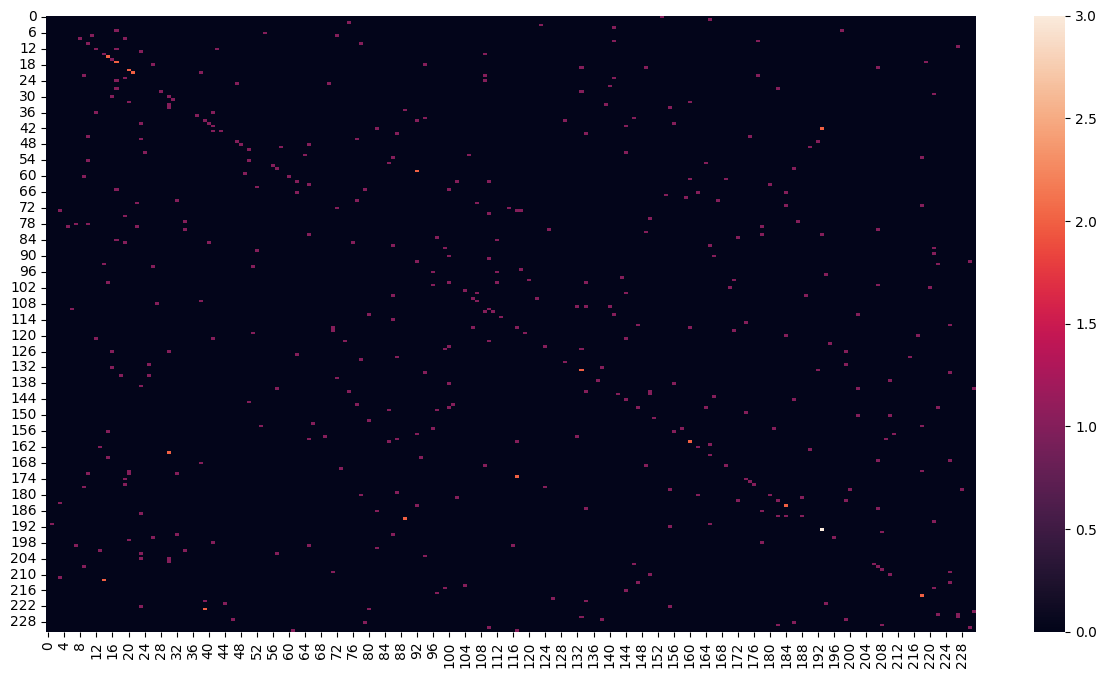

In [ ]:
sns.heatmap(conf_matrix)

# Model 1 - Deep Neural Network - 2

In [59]:
print('X_train shape =',X_train_vec.shape)
print('y_train shape =',y_train_vec_1D.shape)
print('X_test shape =',X_test_vec.shape)
print('y_test shape =',y_test_vec_1D.shape)

X_train shape = (1276, 85, 130)
y_train shape = (1276, 232)
X_test shape = (439, 85, 130)
y_test shape = (439, 232)


## Model Building

In [163]:
tf.keras.backend.clear_session()

model_5B_1 = Sequential()
model_5B_1.add(
    TimeDistributed(
        Dense(50, activation='selu'),
        input_shape=(X_train_vec.shape[1], X_train_vec.shape[2])
        ))
model_5B_1.add(Dropout(0.25))
model_5B_1.add(BatchNormalization())
model_5B_1.add(
    TimeDistributed
     (
        Dense(50, activation='selu')
        ))
model_5B_1.add(Dropout(0.25))
model_5B_1.add(BatchNormalization())
model_5B_1.add(
    TimeDistributed
     (
        Dense(25, activation='selu')
        ))
model_5B_1.add(Dropout(0.25))
model_5B_1.add(BatchNormalization())
model_5B_1.add(
    TimeDistributed
     (
        Dense(25, activation='selu')
        ))
model_5B_1.add(Dropout(0.25))
model_5B_1.add(BatchNormalization())
model_5B_1.add(
    TimeDistributed
     (
        Dense(5, activation='selu')
        ))
model_5B_1.add(Dropout(0.25))
model_5B_1.add(Flatten())
model_5B_1.add(BatchNormalization())

model_5B_1.add(Dense(units=10,activation='selu'))
model_5B_1.add(Dropout(0.5))
#model_4F_1.add(BatchNormalization())

model_5B_1.add(Dense(units=vocab_size,activation='softmax'))

In [164]:
model_5B_1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [165]:
#Model Summary
model_5B_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 85, 50)           6550      
 ibuted)                                                         
                                                                 
 dropout (Dropout)           (None, 85, 50)            0         
                                                                 
 batch_normalization (BatchN  (None, 85, 50)           200       
 ormalization)                                                   
                                                                 
 time_distributed_1 (TimeDis  (None, 85, 50)           2550      
 tributed)                                                       
                                                                 
 dropout_1 (Dropout)         (None, 85, 50)            0         
                                                        

In [166]:
# Creating Checkpoints
checkpoint_filepath = '/content/drive/MyDrive/Mtech_Project/Code/5B_Model_1.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

## Training

In [167]:
# fit network
history = model_5B_1.fit(X_train_vec, y_train_vec_1D, epochs=50, batch_size=16,
                         validation_split=0.3,
                         callbacks=[model_checkpoint_callback],
                         verbose=2, shuffle=False)

Epoch 1/50
56/56 - 6s - loss: 5.5309 - accuracy: 0.0056 - val_loss: 5.4797 - val_accuracy: 0.0026 - 6s/epoch - 101ms/step
Epoch 2/50
56/56 - 1s - loss: 5.4937 - accuracy: 0.0034 - val_loss: 5.4473 - val_accuracy: 0.0052 - 516ms/epoch - 9ms/step
Epoch 3/50
56/56 - 1s - loss: 5.4757 - accuracy: 0.0101 - val_loss: 5.4378 - val_accuracy: 0.0104 - 512ms/epoch - 9ms/step
Epoch 4/50
56/56 - 0s - loss: 5.4378 - accuracy: 0.0067 - val_loss: 5.3909 - val_accuracy: 0.0052 - 475ms/epoch - 8ms/step
Epoch 5/50
56/56 - 0s - loss: 5.3719 - accuracy: 0.0101 - val_loss: 5.3317 - val_accuracy: 0.0052 - 470ms/epoch - 8ms/step
Epoch 6/50
56/56 - 1s - loss: 5.2885 - accuracy: 0.0202 - val_loss: 5.2824 - val_accuracy: 0.0235 - 557ms/epoch - 10ms/step
Epoch 7/50
56/56 - 1s - loss: 5.2142 - accuracy: 0.0291 - val_loss: 5.3102 - val_accuracy: 0.0235 - 591ms/epoch - 11ms/step
Epoch 8/50
56/56 - 1s - loss: 5.1725 - accuracy: 0.0235 - val_loss: 5.2366 - val_accuracy: 0.0235 - 528ms/epoch - 9ms/step
Epoch 9/50
56/5

In [168]:
# fit network
history_2 = model_5B_1.fit(X_train_vec, y_train_vec_1D, initial_epoch=50, epochs=150, batch_size=16,
                         validation_split=0.3,
                         callbacks=[model_checkpoint_callback],
                         verbose=2, shuffle=False)

Epoch 51/150
56/56 - 1s - loss: 3.8589 - accuracy: 0.1198 - val_loss: 4.5199 - val_accuracy: 0.0653 - 614ms/epoch - 11ms/step
Epoch 52/150
56/56 - 1s - loss: 3.8477 - accuracy: 0.0885 - val_loss: 4.2907 - val_accuracy: 0.0836 - 570ms/epoch - 10ms/step
Epoch 53/150
56/56 - 1s - loss: 3.8164 - accuracy: 0.1008 - val_loss: 4.2650 - val_accuracy: 0.0836 - 535ms/epoch - 10ms/step
Epoch 54/150
56/56 - 1s - loss: 3.8386 - accuracy: 0.1075 - val_loss: 4.2523 - val_accuracy: 0.0809 - 519ms/epoch - 9ms/step
Epoch 55/150
56/56 - 0s - loss: 3.8864 - accuracy: 0.0929 - val_loss: 4.7976 - val_accuracy: 0.0496 - 479ms/epoch - 9ms/step
Epoch 56/150
56/56 - 1s - loss: 3.8396 - accuracy: 0.0907 - val_loss: 4.2911 - val_accuracy: 0.0862 - 711ms/epoch - 13ms/step
Epoch 57/150
56/56 - 1s - loss: 3.8755 - accuracy: 0.0918 - val_loss: 4.3017 - val_accuracy: 0.0914 - 790ms/epoch - 14ms/step
Epoch 58/150
56/56 - 1s - loss: 3.8634 - accuracy: 0.0929 - val_loss: 4.3285 - val_accuracy: 0.0836 - 647ms/epoch - 12ms

In [169]:
# fit network
history_3 = model_5B_1.fit(X_train_vec, y_train_vec_1D, initial_epoch=150, epochs=300, batch_size=16,
                         validation_split=0.3,
                         callbacks=[model_checkpoint_callback],
                         verbose=2, shuffle=False)

Epoch 151/300
56/56 - 1s - loss: 3.5017 - accuracy: 0.1176 - val_loss: 4.1183 - val_accuracy: 0.1436 - 538ms/epoch - 10ms/step
Epoch 152/300
56/56 - 0s - loss: 3.4742 - accuracy: 0.1467 - val_loss: 4.1105 - val_accuracy: 0.1436 - 475ms/epoch - 8ms/step
Epoch 153/300
56/56 - 1s - loss: 3.4554 - accuracy: 0.1310 - val_loss: 4.1427 - val_accuracy: 0.1279 - 523ms/epoch - 9ms/step
Epoch 154/300
56/56 - 0s - loss: 3.5414 - accuracy: 0.1299 - val_loss: 4.1320 - val_accuracy: 0.1070 - 466ms/epoch - 8ms/step
Epoch 155/300
56/56 - 0s - loss: 3.5387 - accuracy: 0.1321 - val_loss: 4.2887 - val_accuracy: 0.1305 - 470ms/epoch - 8ms/step
Epoch 156/300
56/56 - 0s - loss: 3.4847 - accuracy: 0.1377 - val_loss: 4.1665 - val_accuracy: 0.0940 - 475ms/epoch - 8ms/step
Epoch 157/300
56/56 - 0s - loss: 3.5309 - accuracy: 0.1254 - val_loss: 4.2105 - val_accuracy: 0.1201 - 477ms/epoch - 9ms/step
Epoch 158/300
56/56 - 1s - loss: 3.5629 - accuracy: 0.1288 - val_loss: 4.4719 - val_accuracy: 0.0992 - 506ms/epoch - 

In [170]:
# fit network
history_4 = model_5B_1.fit(X_train_vec, y_train_vec_1D, initial_epoch=300, epochs=500, batch_size=16,
                         validation_split=0.3,
                         callbacks=[model_checkpoint_callback],
                         verbose=2, shuffle=False)

Epoch 301/500
56/56 - 1s - loss: 3.4168 - accuracy: 0.1467 - val_loss: 4.1114 - val_accuracy: 0.1619 - 539ms/epoch - 10ms/step
Epoch 302/500
56/56 - 0s - loss: 3.4458 - accuracy: 0.1445 - val_loss: 4.1365 - val_accuracy: 0.1593 - 484ms/epoch - 9ms/step
Epoch 303/500
56/56 - 0s - loss: 3.2938 - accuracy: 0.1545 - val_loss: 4.1476 - val_accuracy: 0.1436 - 481ms/epoch - 9ms/step
Epoch 304/500
56/56 - 0s - loss: 3.4060 - accuracy: 0.1624 - val_loss: 4.1445 - val_accuracy: 0.1488 - 473ms/epoch - 8ms/step
Epoch 305/500
56/56 - 0s - loss: 3.3710 - accuracy: 0.1501 - val_loss: 4.1062 - val_accuracy: 0.1488 - 477ms/epoch - 9ms/step
Epoch 306/500
56/56 - 0s - loss: 3.3764 - accuracy: 0.1534 - val_loss: 4.1429 - val_accuracy: 0.1384 - 473ms/epoch - 8ms/step
Epoch 307/500
56/56 - 0s - loss: 3.4344 - accuracy: 0.1366 - val_loss: 4.3188 - val_accuracy: 0.1462 - 473ms/epoch - 8ms/step
Epoch 308/500
56/56 - 0s - loss: 3.3591 - accuracy: 0.1545 - val_loss: 4.1600 - val_accuracy: 0.1697 - 466ms/epoch - 

In [171]:
# fit network
history_5 = model_5B_1.fit(X_train_vec, y_train_vec_1D, initial_epoch=500, epochs=1000, batch_size=32,
                         validation_split=0.3,
                         callbacks=[model_checkpoint_callback],
                         verbose=2, shuffle=False)

Epoch 501/1000
28/28 - 0s - loss: 3.2571 - accuracy: 0.1769 - val_loss: 4.2454 - val_accuracy: 0.1488 - 337ms/epoch - 12ms/step
Epoch 502/1000
28/28 - 0s - loss: 3.2472 - accuracy: 0.1725 - val_loss: 4.2102 - val_accuracy: 0.1462 - 266ms/epoch - 9ms/step
Epoch 503/1000
28/28 - 0s - loss: 3.2065 - accuracy: 0.1792 - val_loss: 4.2564 - val_accuracy: 0.1697 - 270ms/epoch - 10ms/step
Epoch 504/1000
28/28 - 0s - loss: 3.1770 - accuracy: 0.1881 - val_loss: 4.1583 - val_accuracy: 0.1593 - 268ms/epoch - 10ms/step
Epoch 505/1000
28/28 - 0s - loss: 3.2704 - accuracy: 0.1635 - val_loss: 4.1997 - val_accuracy: 0.1671 - 267ms/epoch - 10ms/step
Epoch 506/1000
28/28 - 0s - loss: 3.2184 - accuracy: 0.1781 - val_loss: 4.2616 - val_accuracy: 0.1462 - 264ms/epoch - 9ms/step
Epoch 507/1000
28/28 - 0s - loss: 3.1681 - accuracy: 0.1713 - val_loss: 4.2659 - val_accuracy: 0.1749 - 260ms/epoch - 9ms/step
Epoch 508/1000
28/28 - 0s - loss: 3.2352 - accuracy: 0.1579 - val_loss: 4.2354 - val_accuracy: 0.1619 - 262

In [172]:
val_loss = list(history.history['val_loss'])
val_loss.extend(history_2.history['val_loss'])
val_loss.extend(history_3.history['val_loss'])
val_loss.extend(history_4.history['val_loss'])
val_loss.extend(history_5.history['val_loss'])
#val_loss.extend(history_6.history['val_loss'])
#val_loss.extend(history_7.history['val_loss'])
#val_loss.extend(history_8.history['val_loss'])
#val_loss.extend(history_9.history['val_loss'])
#val_loss.extend(history_10.history['val_loss'])

In [173]:
train_loss = list(history.history['loss'])
train_loss.extend(history_2.history['loss'])
train_loss.extend(history_3.history['loss'])
train_loss.extend(history_4.history['loss'])
train_loss.extend(history_5.history['loss'])
#train_loss.extend(history_6.history['loss'])
#train_loss.extend(history_7.history['loss'])
#train_loss.extend(history_8.history['loss'])
#train_loss.extend(history_9.history['loss'])
#train_loss.extend(history_10.history['loss'])

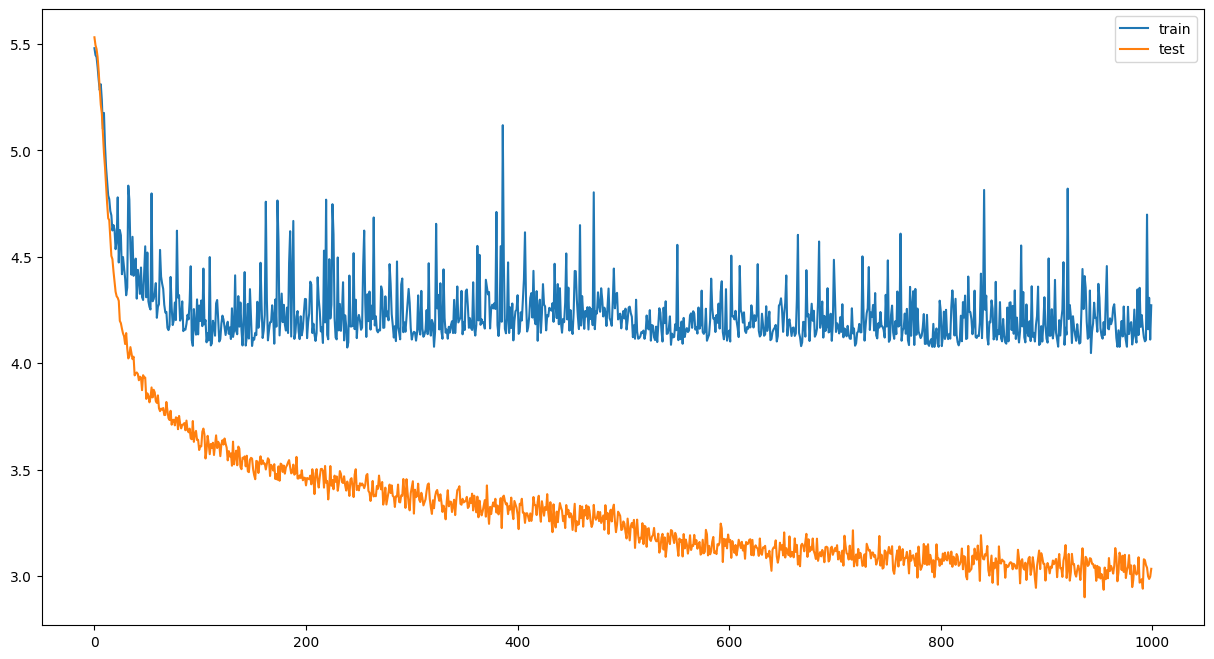

In [174]:
# plot history
plt.plot(np.array(val_loss), label='train')
plt.plot(np.array(train_loss), label='test')
plt.legend()
plt.show()

## Prediction

In [175]:
model_5B_1.load_weights(checkpoint_filepath)

In [176]:
# make a prediction
pred_prob_y_1D = model_5B_1.predict(X_test_vec)
pred_val_y_1D = np.argmax(pred_prob_y_1D, axis=1)

14/14 [==============================] - 0s 2ms/step


In [177]:
pred_prob_y_1D[3]

array([1.49227508e-09, 2.87618925e-04, 8.33764204e-08, 6.38902374e-03,
       1.19836419e-03, 8.74445599e-04, 2.68078038e-05, 2.11479872e-07,
       7.31045904e-04, 3.56595342e-06, 1.77767116e-03, 1.40798860e-04,
       3.70335407e-08, 8.08965961e-09, 1.12869206e-03, 2.62648170e-03,
       2.51181569e-04, 7.53316272e-04, 2.21187037e-07, 6.99695812e-09,
       5.24202948e-09, 4.83090634e-09, 1.47848245e-04, 3.82397133e-07,
       8.47394599e-09, 1.95392198e-03, 5.61231173e-10, 4.23174240e-02,
       2.09419709e-02, 2.86182876e-06, 1.21092238e-02, 4.15550871e-03,
       3.12196025e-09, 3.36196646e-02, 1.07807976e-08, 1.19424715e-09,
       3.92123439e-07, 3.14505257e-08, 1.98485228e-08, 7.48204475e-05,
       2.14228616e-03, 1.12578971e-02, 1.19978372e-09, 1.52574948e-08,
       3.43894423e-03, 7.73164377e-09, 1.07718208e-07, 1.58826037e-08,
       2.03869597e-08, 1.30594312e-03, 7.30124116e-03, 3.12182674e-04,
       2.66815459e-09, 2.42480063e-08, 2.32100300e-03, 7.54664168e-02,
      

In [178]:
pred_val_y_1D[3]

205

In [179]:
pred_prob_y_1D.shape

(439, 232)

In [180]:
# make a prediction
pred_prob_train_y_1D = model_5B_1.predict(X_train_vec)
pred_val_train_y_1D = np.argmax(pred_prob_train_y_1D, axis=1)

40/40 [==============================] - 0s 2ms/step


In [181]:
# Convert Prediction probability to binary value
y_pred_vec_1D = np.zeros( pred_prob_y_1D.shape )
y_pred_vec_1D[np.arange(y_pred_vec_1D.shape[0]), pred_val_y_1D] = 1

print(y_pred_vec_1D)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [182]:
# Convert Prediction probability to binary value
y_pred_vec_train_1D = np.zeros( pred_prob_train_y_1D.shape )
y_pred_vec_train_1D[np.arange(y_pred_vec_train_1D.shape[0]), pred_val_train_y_1D] = 1

print(y_pred_vec_train_1D)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Evaluation

In [183]:
print('Training Accuracy Score',accuracy_score(y_train_vec_1D,y_pred_vec_train_1D))

Training Accuracy Score 0.4615987460815047


In [184]:
#conf_matrix = confusion_matrix(y_test_vec_2.argmax(axis=1),y_pred_vec_2.argmax(axis=1))
print('Testing Accuracy Score',accuracy_score(y_test_vec_1D,y_pred_vec_1D))
print('Classification report \n',classification_report(y_test_vec_1D,y_pred_vec_1D))
#print('Confusion Matrix \n',conf_matrix)

Testing Accuracy Score 0.2619589977220957
Classification report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         2
           5       1.00      0.50      0.67         2
           6       0.00      0.00      0.00         1
           7       0.33      0.67      0.44         3
           8       0.00      0.00      0.00         1
           9       0.33      1.00      0.50         2
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         2
          12       0.50      1.00      0.67         2
          13       0.00      0.00      0.00         1
          14       1.00      0.33      0.50         3
          15       0.50      0.50      0.50         2
          16   

<Axes: >

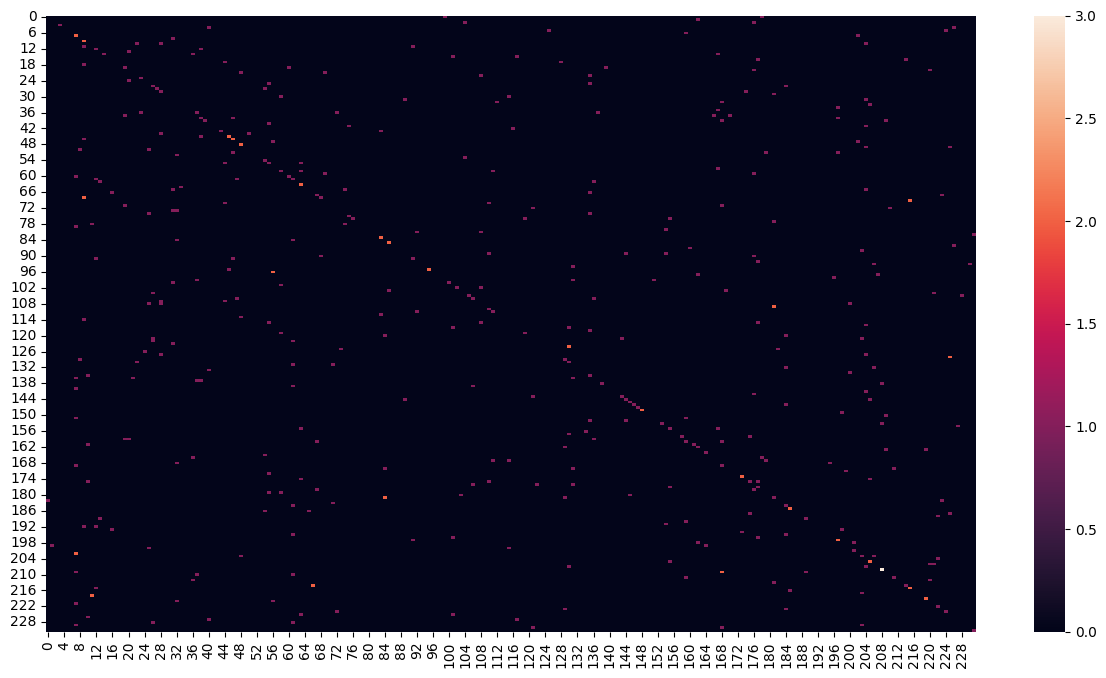

In [96]:
conf_matrix = confusion_matrix(y_test_vec_1D.argmax(axis=1),y_pred_vec_1D.argmax(axis=1))
sns.heatmap(conf_matrix)

# Model 2 - LSTM

In [ ]:
print('X_train shape =',X_train_vec.shape)
print('y_train shape =',y_train_vec_1D.shape)
print('X_test shape =',X_test_vec.shape)
print('y_test shape =',y_test_vec_1D.shape)

X_train shape = (1276, 85, 130)
y_train shape = (1276, 232)
X_test shape = (439, 85, 130)
y_test shape = (439, 232)


## Model Building

In [ ]:
tf.keras.backend.clear_session()

model_lstm = Sequential()
model_lstm.add(
    TimeDistributed(
        Dense(500, activation='relu'),
        input_shape=(X_train_vec.shape[1], X_train_vec.shape[2])
        ))
model_lstm.add(
    TimeDistributed(
        Dense(250, activation='relu')
        ))
model_lstm.add(
    TimeDistributed(
        Dense(150, activation='relu')
        ))
model_lstm.add(
    Bidirectional
     (
        LSTM(150, return_sequences=False, activation='relu')
        ))
model_lstm.add(Dense(units=1024,activation='relu'))
model_lstm.add(Dense(units=vocab_size,activation='softmax'))

In [ ]:
#opt = Adam(learning_rate=0.005)

In [ ]:
model_lstm.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [ ]:
#Model Summary
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 85, 500)          65500     
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 85, 250)          125250    
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 85, 150)          37650     
 tributed)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 300)              361200    
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1024)              3

In [ ]:
# Creating Checkpoints
checkpoint_filepath = '/content/drive/MyDrive/Mtech_Project/Code/5B_Model_2.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

## Training

In [ ]:
# fit network
history = model_lstm.fit(X_train_vec, y_train_vec_1D, epochs=200, batch_size=128,
                         validation_split=0.3,
                         callbacks=[model_checkpoint_callback],
                         verbose=2, shuffle=False)

Epoch 1/200
7/7 - 8s - loss: 5.4475 - accuracy: 0.0034 - val_loss: 5.4478 - val_accuracy: 0.0104 - 8s/epoch - 1s/step
Epoch 2/200
7/7 - 2s - loss: 5.3693 - accuracy: 0.0112 - val_loss: 5.4709 - val_accuracy: 0.0078 - 2s/epoch - 286ms/step
Epoch 3/200
7/7 - 2s - loss: 5.2759 - accuracy: 0.0123 - val_loss: 5.5943 - val_accuracy: 0.0026 - 2s/epoch - 281ms/step
Epoch 4/200
7/7 - 3s - loss: 6.6573 - accuracy: 0.0146 - val_loss: 5.6071 - val_accuracy: 0.0104 - 3s/epoch - 469ms/step
Epoch 5/200
7/7 - 3s - loss: 5.2478 - accuracy: 0.0146 - val_loss: 5.6688 - val_accuracy: 0.0052 - 3s/epoch - 358ms/step
Epoch 6/200
7/7 - 3s - loss: 5.1821 - accuracy: 0.0179 - val_loss: 6.1997 - val_accuracy: 0.0131 - 3s/epoch - 431ms/step
Epoch 7/200
7/7 - 2s - loss: 1595.7538 - accuracy: 0.0157 - val_loss: 5.6003 - val_accuracy: 0.0026 - 2s/epoch - 295ms/step
Epoch 8/200
7/7 - 2s - loss: 5.2564 - accuracy: 0.0202 - val_loss: 5.5671 - val_accuracy: 0.0078 - 2s/epoch - 288ms/step
Epoch 9/200
7/7 - 3s - loss: 5.2

In [ ]:
# fit network
history = model_lstm.fit(X_train_vec, y_train_vec_1D, initial_epoch=200, epochs=1000, batch_size=128,
                         validation_split=0.3,
                         callbacks=[model_checkpoint_callback],
                         verbose=2, shuffle=False)

Epoch 201/1000
7/7 - 3s - loss: 1.0959 - accuracy: 0.7052 - val_loss: 14.0232 - val_accuracy: 0.1070 - 3s/epoch - 392ms/step
Epoch 202/1000
7/7 - 2s - loss: 1.0173 - accuracy: 0.7231 - val_loss: 13.6220 - val_accuracy: 0.1097 - 2s/epoch - 291ms/step
Epoch 203/1000
7/7 - 3s - loss: 0.9766 - accuracy: 0.7422 - val_loss: 13.8089 - val_accuracy: 0.1253 - 3s/epoch - 399ms/step
Epoch 204/1000
7/7 - 2s - loss: 0.9631 - accuracy: 0.7365 - val_loss: 14.3532 - val_accuracy: 0.1070 - 2s/epoch - 285ms/step
Epoch 205/1000
7/7 - 3s - loss: 0.9354 - accuracy: 0.7534 - val_loss: 14.3822 - val_accuracy: 0.1279 - 3s/epoch - 359ms/step
Epoch 206/1000
7/7 - 4s - loss: 0.8856 - accuracy: 0.7679 - val_loss: 14.8390 - val_accuracy: 0.1070 - 4s/epoch - 504ms/step
Epoch 207/1000
7/7 - 2s - loss: 0.8625 - accuracy: 0.7724 - val_loss: 14.9767 - val_accuracy: 0.1279 - 2s/epoch - 327ms/step
Epoch 208/1000
7/7 - 2s - loss: 0.8338 - accuracy: 0.7881 - val_loss: 14.8766 - val_accuracy: 0.1201 - 2s/epoch - 324ms/step


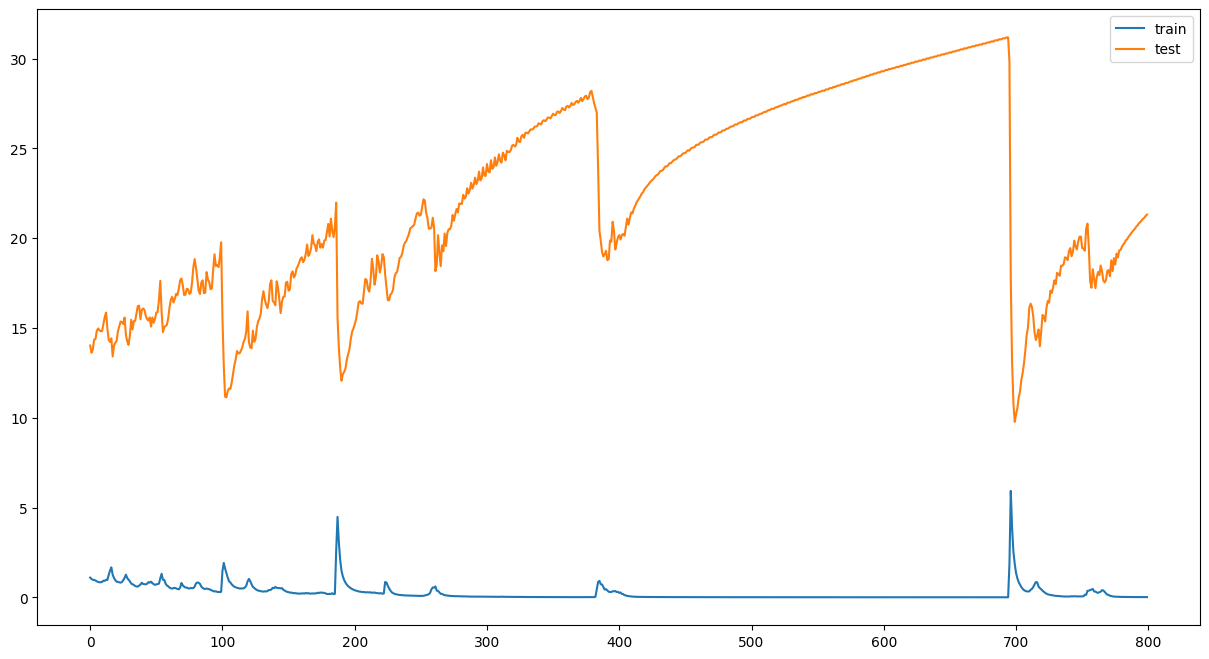

In [ ]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## Prediction

In [ ]:
model_lstm.load_weights(checkpoint_filepath)

In [ ]:
# make a prediction
pred_prob_y = model_lstm.predict(X_test_vec)
pred_val_y = np.argmax(pred_prob_y, axis=1)

14/14 [==============================] - 1s 23ms/step


In [ ]:
pred_prob_y[3]

array([1.13857964e-27, 2.55166137e-38, 1.54538348e-38, 1.26029663e-36,
       4.44683043e-30, 6.79530715e-32, 2.41217777e-33, 5.65070613e-09,
       1.04784117e-34, 2.60112156e-05, 5.98564068e-24, 0.00000000e+00,
       1.94789144e-24, 0.00000000e+00, 0.00000000e+00, 6.64333718e-33,
       0.00000000e+00, 7.35588506e-19, 4.00443639e-28, 3.00561621e-16,
       1.24716051e-26, 1.42553225e-02, 7.87933510e-15, 2.70911746e-25,
       2.29401467e-15, 1.85998120e-10, 3.97997936e-35, 0.00000000e+00,
       2.46382698e-35, 7.49657547e-23, 4.60000823e-23, 2.71843041e-13,
       4.01166811e-13, 4.04142525e-33, 5.44019588e-27, 0.00000000e+00,
       1.37256022e-14, 2.26487389e-25, 6.29704495e-15, 1.89916260e-26,
       5.27973835e-21, 1.28773247e-25, 6.29014483e-18, 5.54227389e-18,
       0.00000000e+00, 3.75356023e-22, 1.94366340e-21, 9.01428411e-12,
       1.23713194e-22, 3.17757072e-37, 5.03330138e-18, 5.56210244e-24,
       2.71652916e-16, 0.00000000e+00, 1.58821283e-21, 0.00000000e+00,
      

In [ ]:
pred_val_y[3]

177

In [ ]:
pred_prob_y.shape

(439, 232)

In [ ]:
y_test_vec_1D[3]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [ ]:
y_test_vec_1D.shape

(439, 232)

In [ ]:
# Convert Prediction probability to binary value
y_pred_vec_2 = np.zeros( pred_prob_y.shape )
y_pred_vec_2[np.arange(y_pred_vec_2.shape[0]), pred_val_y] = 1

print(y_pred_vec_2)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# make a prediction
pred_prob_train_y = model_lstm.predict(X_train_vec)
pred_val_train_y = np.argmax(pred_prob_train_y, axis=1)

14/14 [==============================] - 1s 23ms/step


In [ ]:
# Convert Prediction probability to binary value
y_pred_train_vec_2 = np.zeros( pred_prob_train_y.shape )
y_pred_train_vec_2[np.arange(y_pred_train_vec_2.shape[0]), pred_val_train_y] = 1

print(y_pred_train_vec_2)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Evaluation

In [ ]:
print('Training Accuracy Score',accuracy_score(y_train_vec_1D,y_pred_train_vec_2))

Training Accuracy Score 1.0


In [ ]:
conf_matrix = confusion_matrix(y_test_vec_1D.argmax(axis=1),y_pred_vec_2.argmax(axis=1))
print('Accuracy Score',accuracy_score(y_test_vec_1D,y_pred_vec_2))
print('Classification report \n',classification_report(y_test_vec_1D,y_pred_vec_2))
print('Confusion Matrix \n',conf_matrix)

Accuracy Score 0.1662870159453303
Classification report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           8       1.00      0.50      0.67         2
           9       0.00      0.00      0.00         2
          10       0.20      0.50      0.29         2
          11       0.00      0.00      0.00         1
          12       0.33      0.33      0.33         3
          13       0.00      0.00      0.00         1
          14       0.25      0.50      0.33         2
          15       0.40      1.00      0.57         2
          16       0.25

<Axes: >

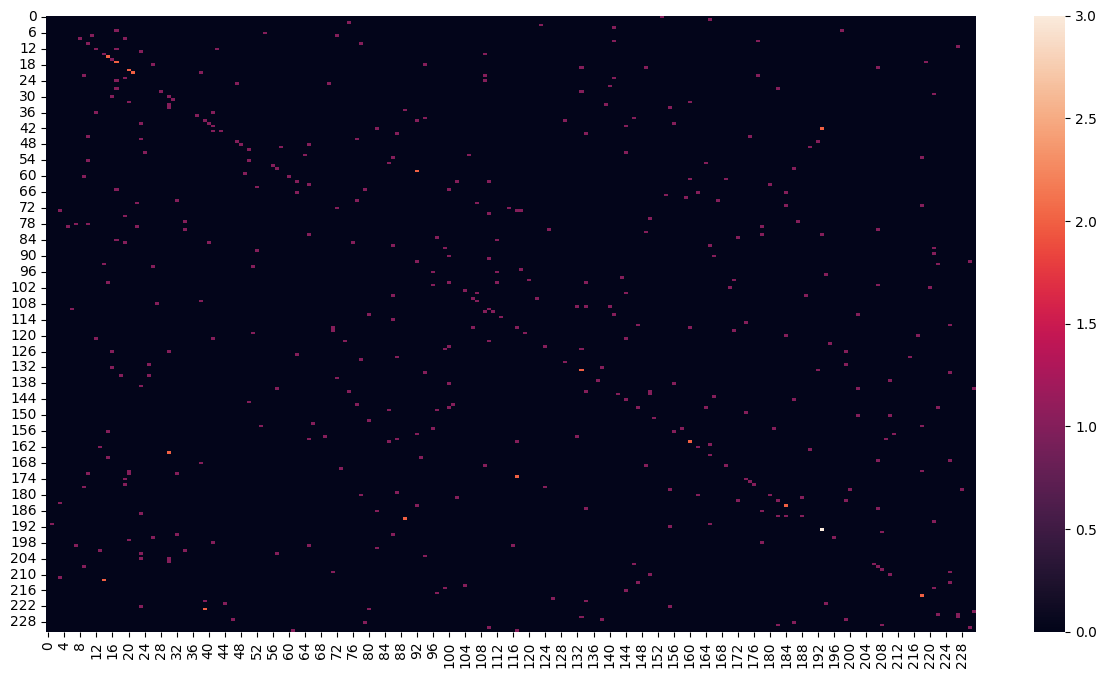

In [ ]:
sns.heatmap(conf_matrix)

# Model 3 - GRU

## Model Building

In [ ]:
tf.keras.backend.clear_session()

model_gru = Sequential()
model_gru.add(
    TimeDistributed(
        Dense(250, activation='relu'),
        input_shape=(X_train_vec.shape[1], X_train_vec.shape[2])
        ))
model_gru.add(Dropout(.2))
model_gru.add(
    TimeDistributed(
        Dense(150, activation='relu')
        ))
model_gru.add(Dropout(.2))
model_gru.add(
    TimeDistributed(
        Dense(100, activation='relu')
        ))
model_gru.add(Dropout(.2))
model_gru.add(
    TimeDistributed(
        Dense(75, activation='relu')
        ))
model_gru.add(Dropout(.2))
model_gru.add(
    TimeDistributed(
        Dense(50, activation='relu')
        ))
model_gru.add(Dropout(.2))
model_gru.add(
    TimeDistributed(
        Dense(25, activation='relu')
        ))
model_gru.add(Dropout(.2))
model_gru.add(
    TimeDistributed(
        Dense(10, activation='relu')
        ))
model_gru.add(Dropout(.2))
model_gru.add(
    Bidirectional
     (
        GRU(50, activation='relu')
        ))
model_gru.add(Dropout(.2))
model_gru.add(Dense(units=vocab_size,activation='softmax'))

In [ ]:
model_gru.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
#Model Summary
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 85, 250)          32750     
 ibuted)                                                         
                                                                 
 dropout (Dropout)           (None, 85, 250)           0         
                                                                 
 time_distributed_1 (TimeDis  (None, 85, 150)          37650     
 tributed)                                                       
                                                                 
 dropout_1 (Dropout)         (None, 85, 150)           0         
                                                                 
 time_distributed_2 (TimeDis  (None, 85, 100)          15100     
 tributed)                                                       
                                                        

In [ ]:
# Creating Checkpoints
checkpoint_filepath_3 = '/content/drive/MyDrive/Mtech_Project/Code/5B_Model_3.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath_3,
    #verbose=1,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

## Training

In [ ]:
# fit network
history_3 = model_gru.fit(X_train_vec, y_train_vec_1D, epochs=50, batch_size=128,
                         validation_split=0.3,
                         callbacks=[model_checkpoint_callback],
                         verbose=2, shuffle=False)

Epoch 1/50
7/7 - 10s - loss: 5.4480 - accuracy: 0.0034 - val_loss: 5.4482 - val_accuracy: 0.0078 - 10s/epoch - 1s/step
Epoch 2/50
7/7 - 2s - loss: 5.4403 - accuracy: 0.0078 - val_loss: 5.4481 - val_accuracy: 0.0026 - 2s/epoch - 350ms/step
Epoch 3/50
7/7 - 2s - loss: 5.4294 - accuracy: 0.0090 - val_loss: 5.4573 - val_accuracy: 0.0026 - 2s/epoch - 356ms/step
Epoch 4/50
7/7 - 4s - loss: 5.3986 - accuracy: 0.0112 - val_loss: 5.4956 - val_accuracy: 0.0000e+00 - 4s/epoch - 615ms/step
Epoch 5/50
7/7 - 2s - loss: 5.3805 - accuracy: 0.0090 - val_loss: 5.4759 - val_accuracy: 0.0026 - 2s/epoch - 357ms/step
Epoch 6/50
7/7 - 3s - loss: 5.3564 - accuracy: 0.0078 - val_loss: 5.5095 - val_accuracy: 0.0078 - 3s/epoch - 358ms/step
Epoch 7/50
7/7 - 2s - loss: 5.3445 - accuracy: 0.0168 - val_loss: 5.4820 - val_accuracy: 0.0052 - 2s/epoch - 350ms/step
Epoch 8/50
7/7 - 3s - loss: 5.3391 - accuracy: 0.0123 - val_loss: 5.5063 - val_accuracy: 0.0052 - 3s/epoch - 470ms/step
Epoch 9/50
7/7 - 5s - loss: 5.3271 - 

In [ ]:
# fit network
history_3 = model_gru.fit(X_train_vec, y_train_vec_1D, initial_epoch=50, epochs=100, batch_size=128,
                         validation_split=0.3,
                         callbacks=[model_checkpoint_callback],
                         verbose=2, shuffle=False)

Epoch 51/100
7/7 - 3s - loss: 3.5623 - accuracy: 0.1469 - val_loss: 5.7782 - val_accuracy: 0.0392 - 3s/epoch - 370ms/step
Epoch 52/100
7/7 - 3s - loss: 3.5620 - accuracy: 0.1413 - val_loss: 5.7781 - val_accuracy: 0.0366 - 3s/epoch - 358ms/step
Epoch 53/100
7/7 - 4s - loss: 3.5025 - accuracy: 0.1682 - val_loss: 5.7199 - val_accuracy: 0.0470 - 4s/epoch - 517ms/step
Epoch 54/100
7/7 - 3s - loss: 3.4365 - accuracy: 0.1603 - val_loss: 5.9208 - val_accuracy: 0.0444 - 3s/epoch - 418ms/step
Epoch 55/100
7/7 - 3s - loss: 3.3683 - accuracy: 0.1659 - val_loss: 5.8366 - val_accuracy: 0.0653 - 3s/epoch - 433ms/step
Epoch 56/100
7/7 - 2s - loss: 3.3078 - accuracy: 0.1783 - val_loss: 5.8096 - val_accuracy: 0.0574 - 2s/epoch - 354ms/step
Epoch 57/100
7/7 - 3s - loss: 3.3041 - accuracy: 0.1749 - val_loss: 5.8992 - val_accuracy: 0.0522 - 3s/epoch - 387ms/step
Epoch 58/100
7/7 - 4s - loss: 3.2536 - accuracy: 0.2085 - val_loss: 5.8066 - val_accuracy: 0.0627 - 4s/epoch - 580ms/step
Epoch 59/100
7/7 - 2s - 

In [ ]:
# fit network
history_3 = model_gru.fit(X_train_vec, y_train_vec_1D, initial_epoch=100, epochs=150, batch_size=128,
                         validation_split=0.3,
                         callbacks=[model_checkpoint_callback],
                         verbose=2, shuffle=False)

Epoch 101/150
7/7 - 3s - loss: 1.8703 - accuracy: 0.4585 - val_loss: 7.0186 - val_accuracy: 0.1332 - 3s/epoch - 379ms/step
Epoch 102/150
7/7 - 3s - loss: 1.8257 - accuracy: 0.4899 - val_loss: 7.0535 - val_accuracy: 0.1305 - 3s/epoch - 365ms/step
Epoch 103/150
7/7 - 4s - loss: 1.8037 - accuracy: 0.4720 - val_loss: 7.3495 - val_accuracy: 0.0940 - 4s/epoch - 502ms/step
Epoch 104/150
7/7 - 3s - loss: 1.9328 - accuracy: 0.4496 - val_loss: 6.9541 - val_accuracy: 0.1332 - 3s/epoch - 466ms/step
Epoch 105/150
7/7 - 3s - loss: 1.8658 - accuracy: 0.4630 - val_loss: 6.9583 - val_accuracy: 0.1175 - 3s/epoch - 359ms/step
Epoch 106/150
7/7 - 2s - loss: 1.8411 - accuracy: 0.4753 - val_loss: 7.2736 - val_accuracy: 0.1149 - 2s/epoch - 351ms/step
Epoch 107/150
7/7 - 3s - loss: 1.8140 - accuracy: 0.4776 - val_loss: 7.1377 - val_accuracy: 0.1410 - 3s/epoch - 454ms/step
Epoch 108/150
7/7 - 4s - loss: 1.7382 - accuracy: 0.4877 - val_loss: 7.2370 - val_accuracy: 0.1253 - 4s/epoch - 611ms/step
Epoch 109/150
7/

In [ ]:
# fit network
history_3 = model_gru.fit(X_train_vec, y_train_vec_1D, initial_epoch=150, epochs=250, batch_size=128,
                         validation_split=0.3,
                         callbacks=[model_checkpoint_callback],
                         verbose=2, shuffle=False)

Epoch 151/250
7/7 - 3s - loss: 1.4815 - accuracy: 0.5605 - val_loss: 7.8578 - val_accuracy: 0.1775 - 3s/epoch - 372ms/step
Epoch 152/250
7/7 - 2s - loss: 1.5045 - accuracy: 0.5605 - val_loss: 7.7621 - val_accuracy: 0.1723 - 2s/epoch - 353ms/step
Epoch 153/250
7/7 - 2s - loss: 1.4048 - accuracy: 0.5729 - val_loss: 7.8905 - val_accuracy: 0.1671 - 2s/epoch - 351ms/step
Epoch 154/250
7/7 - 4s - loss: 1.4167 - accuracy: 0.5930 - val_loss: 8.2209 - val_accuracy: 0.1645 - 4s/epoch - 621ms/step
Epoch 155/250
7/7 - 2s - loss: 1.3877 - accuracy: 0.5975 - val_loss: 8.0855 - val_accuracy: 0.1593 - 2s/epoch - 353ms/step
Epoch 156/250
7/7 - 3s - loss: 1.3108 - accuracy: 0.6200 - val_loss: 8.1026 - val_accuracy: 0.1593 - 3s/epoch - 363ms/step
Epoch 157/250
7/7 - 3s - loss: 1.2795 - accuracy: 0.6222 - val_loss: 8.2109 - val_accuracy: 0.1697 - 3s/epoch - 360ms/step
Epoch 158/250
7/7 - 3s - loss: 1.2951 - accuracy: 0.6211 - val_loss: 8.5895 - val_accuracy: 0.1749 - 3s/epoch - 374ms/step
Epoch 159/250
7/

In [ ]:
# fit network
history_3 = model_gru.fit(X_train_vec, y_train_vec_1D, initial_epoch=250, epochs=350, batch_size=128,
                         validation_split=0.3,
                         callbacks=[model_checkpoint_callback],
                         verbose=2, shuffle=False)

Epoch 251/350
7/7 - 3s - loss: 0.6989 - accuracy: 0.7791 - val_loss: 10.0684 - val_accuracy: 0.1880 - 3s/epoch - 380ms/step
Epoch 252/350
7/7 - 3s - loss: 0.6267 - accuracy: 0.8139 - val_loss: 10.1303 - val_accuracy: 0.1854 - 3s/epoch - 369ms/step
Epoch 253/350
7/7 - 4s - loss: 0.6116 - accuracy: 0.8061 - val_loss: 10.4996 - val_accuracy: 0.1984 - 4s/epoch - 566ms/step
Epoch 254/350
7/7 - 5s - loss: 0.5634 - accuracy: 0.8150 - val_loss: 10.5263 - val_accuracy: 0.2089 - 5s/epoch - 717ms/step
Epoch 255/350
7/7 - 3s - loss: 0.5868 - accuracy: 0.7993 - val_loss: 10.4401 - val_accuracy: 0.1880 - 3s/epoch - 361ms/step
Epoch 256/350
7/7 - 3s - loss: 0.6244 - accuracy: 0.8105 - val_loss: 10.3274 - val_accuracy: 0.2089 - 3s/epoch - 383ms/step
Epoch 257/350
7/7 - 3s - loss: 0.6037 - accuracy: 0.8094 - val_loss: 10.4864 - val_accuracy: 0.1854 - 3s/epoch - 379ms/step
Epoch 258/350
7/7 - 5s - loss: 0.6080 - accuracy: 0.7948 - val_loss: 10.5839 - val_accuracy: 0.1854 - 5s/epoch - 659ms/step
Epoch 25

In [ ]:
# fit network
history_3 = model_gru.fit(X_train_vec, y_train_vec_1D, initial_epoch=350, epochs=500, batch_size=128,
                         validation_split=0.3,
                         callbacks=[model_checkpoint_callback],
                         verbose=2, shuffle=False)

Epoch 351/500
7/7 - 5s - loss: 0.4005 - accuracy: 0.8767 - val_loss: 11.5186 - val_accuracy: 0.2193 - 5s/epoch - 672ms/step
Epoch 352/500
7/7 - 3s - loss: 0.3364 - accuracy: 0.9013 - val_loss: 11.7651 - val_accuracy: 0.2167 - 3s/epoch - 422ms/step
Epoch 353/500
7/7 - 3s - loss: 0.3406 - accuracy: 0.8924 - val_loss: 11.5733 - val_accuracy: 0.2298 - 3s/epoch - 363ms/step
Epoch 354/500
7/7 - 3s - loss: 0.3648 - accuracy: 0.8800 - val_loss: 11.7127 - val_accuracy: 0.2272 - 3s/epoch - 367ms/step
Epoch 355/500
7/7 - 3s - loss: 0.3307 - accuracy: 0.8857 - val_loss: 12.0784 - val_accuracy: 0.2193 - 3s/epoch - 365ms/step
Epoch 356/500
7/7 - 4s - loss: 0.3432 - accuracy: 0.8789 - val_loss: 12.1917 - val_accuracy: 0.2037 - 4s/epoch - 624ms/step
Epoch 357/500
7/7 - 3s - loss: 0.2614 - accuracy: 0.9204 - val_loss: 12.5212 - val_accuracy: 0.2245 - 3s/epoch - 358ms/step
Epoch 358/500
7/7 - 2s - loss: 0.3498 - accuracy: 0.8789 - val_loss: 12.0314 - val_accuracy: 0.2141 - 2s/epoch - 356ms/step
Epoch 35

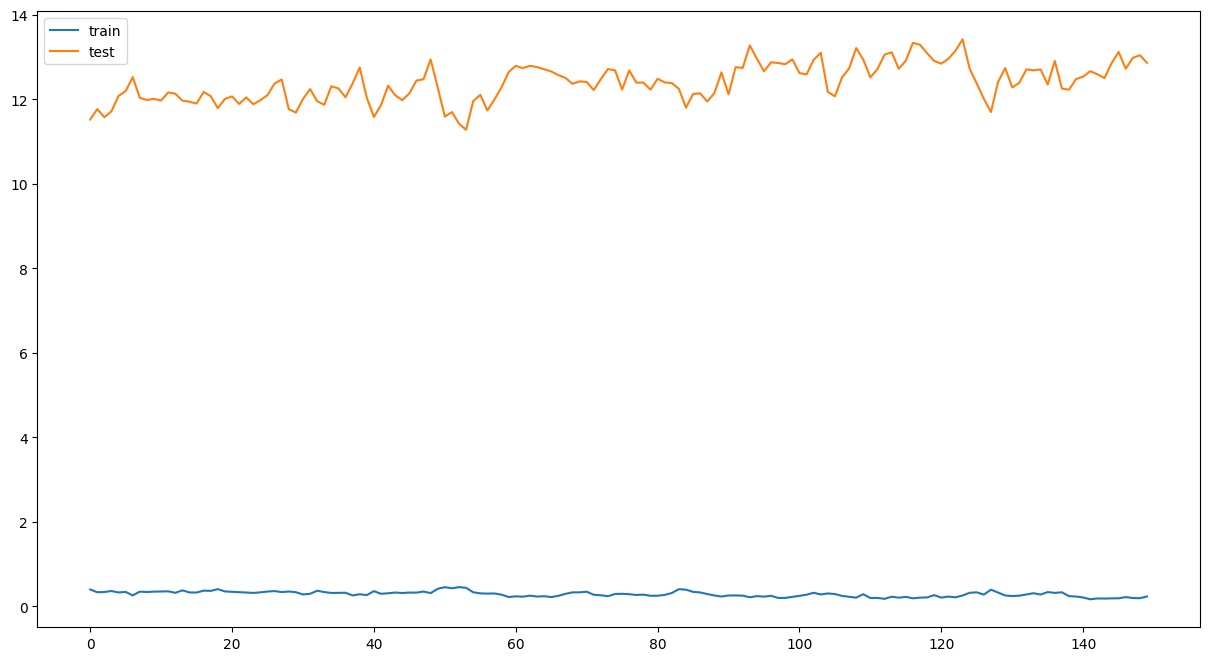

In [ ]:
# plot history
plt.plot(history_3.history['loss'], label='train')
plt.plot(history_3.history['val_loss'], label='test')
plt.legend()
plt.show()

## Prediction

In [ ]:
print(checkpoint_filepath_3)

/content/drive/MyDrive/Mtech_Project/Code/4B_Model_3.h5


In [ ]:
model_gru.load_weights(checkpoint_filepath_3)

In [ ]:
# make a prediction
pred_prob_y_3 = model_gru.predict(X_test_vec)
pred_val_y_3 = np.argmax(pred_prob_y_3, axis=1)

14/14 [==============================] - 0s 29ms/step


In [ ]:
pred_prob_y_3.shape

(439, 232)

In [ ]:
y_test_vec_1D.shape

(439, 232)

In [ ]:
# Convert Prediction probability to binary value
pred_matrix_y_3 = np.zeros( pred_prob_y_3.shape )
pred_matrix_y_3[np.arange(pred_matrix_y_3.shape[0]), pred_val_y_3] = 1

print(pred_matrix_y_3)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
# make a prediction
pred_prob_train_y = model_gru.predict(X_train_vec)
pred_val_train_y = np.argmax(pred_prob_train_y, axis=1)

14/14 [==============================] - 1s 23ms/step


In [ ]:
# Convert Prediction probability to binary value
y_pred_train_vec_3 = np.zeros( pred_prob_train_y.shape )
y_pred_train_vec_3[np.arange(y_pred_train_vec_3.shape[0]), pred_val_train_y] = 1

print(y_pred_train_vec_3)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Evaluation

In [ ]:
print('Training Accuracy Score',accuracy_score(y_train_vec_1D, y_pred_train_vec_3))

Training Accuracy Score 1.0


In [ ]:
conf_matrix = confusion_matrix(y_test_vec_1D.argmax(axis=1),pred_matrix_y_3.argmax(axis=1))
print('Accuracy Score',accuracy_score(y_test_vec_1D,pred_matrix_y_3))
print('Classification report \n',classification_report(y_test_vec_1D,pred_matrix_y_3))
print('Confusion Matrix \n',conf_matrix)

Accuracy Score 0.255125284738041
Classification report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.50      1.00      0.67         2
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           8       0.20      0.50      0.29         2
           9       0.00      0.00      0.00         2
          10       0.17      0.50      0.25         2
          11       0.00      0.00      0.00         1
          12       0.38      1.00      0.55         3
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.50      1.00      0.67         2
          16       0.00 

<Axes: >

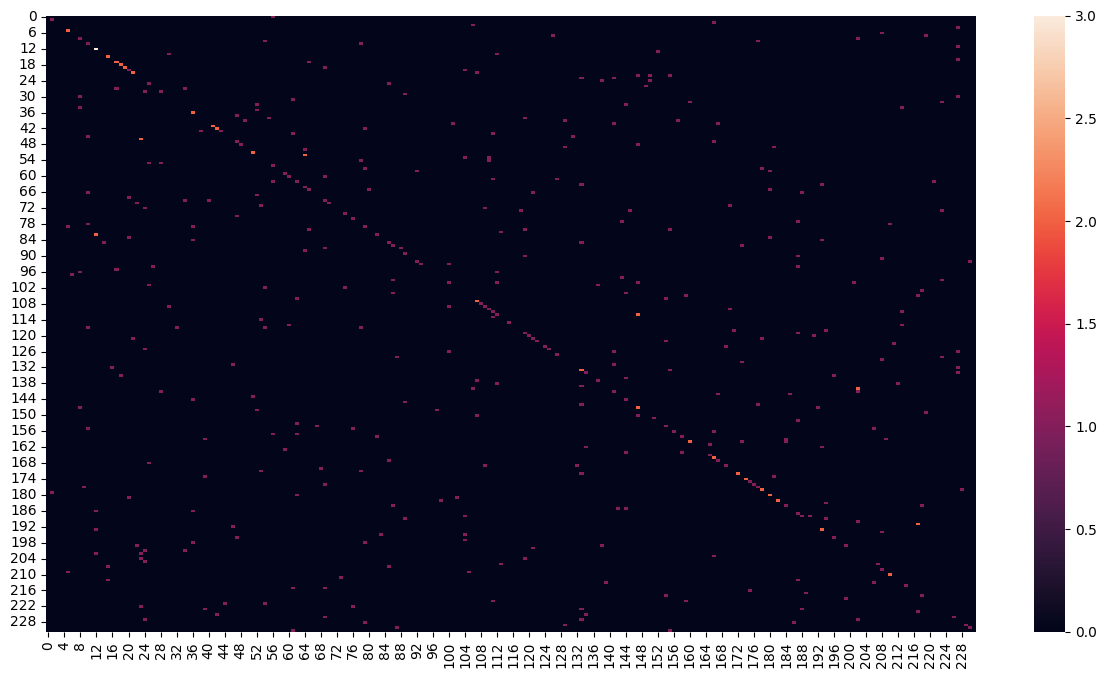

In [ ]:
sns.heatmap(conf_matrix)